In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from scipy import linalg as la
sp.init_printing() 
import warnings
warnings.filterwarnings("ignore")
import pandas as pd


## Goals and Commands

#### Goals
1. Least-Square Problems
2. Applications of QR-fatorization


In this set, we will look a some application of QR factorization in Least-Square Problem.

#### Example
Let $A=\begin{bmatrix} 1 & 1 & 0 \\ 2 & 5 & -1 \\ 0 & 1 & 2 \\ 1 & 1 & 1 \\ 2 & 0 & 3 \end{bmatrix}$ and ${\bf b}=\begin{bmatrix} 10 \\ 1 \\2 \\3 \\4\end{bmatrix}$. Find least-square solution to $A{\bf x}={\bf b}$
#### Solution

We will solve this problem in multiple ways:

1. Regular Approach:
The solution is ${\bf \hat{x}}=(A^TA)^{-1}A^T{\bf b}$

In [2]:
A=np.array([[1,1,0],[2,5,-1],[0,1,2],[1,1,1],[2,0,3]])
b=np.array([10,1,2,3,4])

In [3]:
xhat=np.linalg.inv(A.T@A)@A.T@b
xhat

array([ 2.65660377, -0.40566038,  0.26037736])

2. QR factorization (slower, but more reliable):

In [4]:
Q, R = np.linalg.qr(A)
xhat=np.linalg.inv(R)@Q.T@b
xhat

array([ 2.65660377, -0.40566038,  0.26037736])

3. Modified QR factorization approach that doesn't use inverse.

In [5]:
Q, R = np.linalg.qr(A)
np.linalg.solve(R,Q.T@b)

array([ 2.65660377, -0.40566038,  0.26037736])

#### End of solution

#### Example
Find least square line for given data point : (3,4), (4,4), (1.5,3), (2,4), (3.5,4.5)

#### Solution

In [6]:
x=np.array([3,4,1.5,2,3.5])
y=np.array([4,4,3,4,4.5])
X=np.array([x**0, x]).T
X

array([[1. , 3. ],
       [1. , 4. ],
       [1. , 1.5],
       [1. , 2. ],
       [1. , 3.5]])

In [7]:
line=np.linalg.solve(X.T@X,X.T@y)
line

array([2.8255814 , 0.38372093])

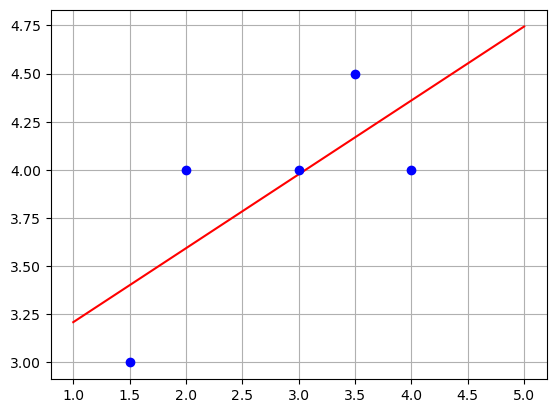

In [8]:
# Let's plot our data and a line:

xs=np.linspace(1,5,100) 
ys=line[0]+line[1]*xs
plt.plot(xs,ys,'-r')
plt.plot(x[:],y[:],'bo')
plt.grid()
plt.show()

#### End of example

For next example we will use the file penguins_size_clean.csv that you should have after doing Files set.

#### Example

In the Files set we saw that there is a correlation between penguin's flipper length and body mass. Here we will find the regression line using least square problem:

1. Find the regression line
2. If the flipper lenght is 200mm, what is approximate body mass of the penguin?

In [10]:
df=pd.read_csv('penguins_size_clean.csv')
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,MALE
1,Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie,Torgersen,40.3,18.0,195,3250,FEMALE
3,Adelie,Torgersen,36.7,19.3,193,3450,FEMALE
4,Adelie,Torgersen,39.3,20.6,190,3650,MALE
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,47.2,13.7,214,4925,FEMALE
329,Gentoo,Biscoe,46.8,14.3,215,4850,FEMALE
330,Gentoo,Biscoe,50.4,15.7,222,5750,MALE
331,Gentoo,Biscoe,45.2,14.8,212,5200,FEMALE


In [11]:
# Part 1
o=np.ones(333)
X=(np.vstack((o,df['flipper_length_mm']))).T
y=np.array(df['body_mass_g'])
line=np.linalg.solve(X.T@X,X.T@y)
line           

array([-5872.09268284,    50.15326594])

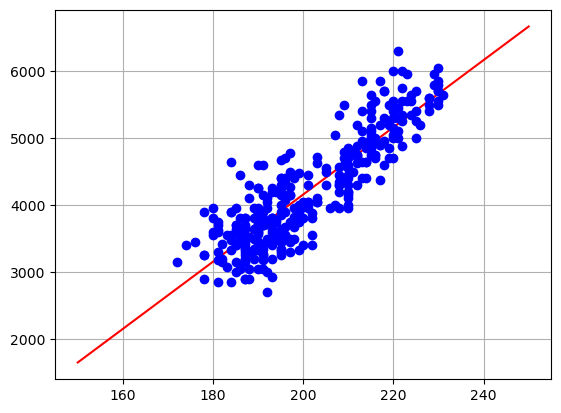

In [12]:
xs=np.linspace(150,250,1000) 
ys=line[0]+line[1]*xs
plt.plot(xs,ys,'-r')
plt.plot(X[:,1],y[:],'bo')
plt.grid()
plt.show()

In [13]:
# Part 2
line[0]+line[1]*200

The mass is about 4158g